# US Housing Market Analysis: Supply-Demand Dynamics

- Author: [Kiruthikaa](https://github.com/kiruthikaa2512/)
- Repository: [datafun-06-eda](https://github.com/kiruthikaa2512/datafun-04-notebooks)
- Date: June 8th, 2025
- Purpose: The purpose of this notebook is to:
    Apply data analytics skills in a real-world housing market context  
    Analyze features influencing housing supply and demand  
    Create effective visualizations and narratives to communicate insights  
    Demonstrate proficiency with Jupyter notebooks, Python libraries, and EDA workflows  

## Project Overview
This project explores supply and demand trends in the US housing market using a real-world dataset.  
We analyze factors such as price, location, property size, and number of bedrooms/bathrooms to uncover  
market dynamics that may reflect seller or buyer advantage.

We use Python tools such as `pandas`, `seaborn`, and `matplotlib` to clean, explore, and visualize data.  
The goal is to practice data storytelling through well-structured EDA and visual interpretation.



## 1. Import Necessary Libraries  
We will use Python libraries like pandas, Seaborn, and Matplotlib for data analysis and visualization.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
import matplotlib.ticker as mticker
import textwrap

## 2. Data Loading
We have 2 data CSV sheets which we are going to load below and do a preview and see if they look good to proceed further.

-demand.csv
-supply.csv

In [2]:
# Load the supply dataset
df_supply = pd.read_csv('project_data/supply.csv')
# Load the demand dataset
df_demand = pd.read_csv('project_data/demand.csv')

print(df_demand.columns)
print(df_supply.columns)


Index(['date', 'price_index', 'mortgage_rate', 'sentiment_index',
       'interest_rate', 'median_price', 'gdp'],
      dtype='object')
Index(['date', 'price_index', 'metro_price_index', 'permits',
       'construction_spending', 'vacant_units'],
      dtype='object')


### 2.1 Initial Data Inspection
Check data types, missing values, and column types.

In [3]:
# Preview the supply dataset
print ("\n---- Preview of the supply dataset -----")
print(df_supply.head())   
# Preview the demand dataset
print ("\n---- Preview of the demand dataset -----")
print(df_demand.head())

# Check the data types of the columns in both datasets
print("\n---- Data types of the supply dataset -----")  
print(df_supply.dtypes)
print("\n---- Data types of the demand dataset -----")  
print(df_demand.dtypes)

# Check the shape of both datasets
print("\n---- Shape of the datasets -----")
print("Shape of supply dataset:", df_supply.shape)
print("Shape of demand dataset:", df_demand.shape)

# Check the info of both datasets
print("\n---- Info of demand dataset -----")
print(df_demand.info())
print("\n---- Info of supply dataset -----")
print(df_supply.info())


# Check for unique values in the supply dataset
print("\n---- Unique values in the supply datasets -----")
print(df_supply.nunique())
# Check for unique values in the demand dataset
print("\n---- Unique values in the demand datasets -----")
print(df_demand.nunique())

# Check for missing values in the supply dataset
print("\n---- Missing values in the supply datasets -----")
print(df_supply.isnull().sum())
# Check for missing values in the demand dataset
print("\n---- Missing values in the demand datasets -----")
print(df_demand.isnull().sum())

# Check for duplicates in the supply dataset
print("\n---- Duplicates in the supply datasets -----")
print(df_supply.duplicated().sum())
# Check for duplicates in the demand dataset
print("\n---- Duplicates in the demand datasets -----")
print(df_demand.duplicated().sum())  


---- Preview of the supply dataset -----
        date  price_index metro_price_index      permits  \
0   1/1/2003      129.321               4.2  1806.333333   
1   1/4/2003      131.756       3.833333333  1837.666667   
2   1/7/2003      135.013       3.633333333  1937.333333   
3  1/10/2003  138.8356667       3.966666667  1972.333333   
4   1/1/2004  143.2986667               3.7  1994.666667   

  construction_spending vacant_units  
0           421328.6667        14908  
1           429308.6667        15244  
2                458890        15614  
3           491437.3333        15654  
4           506856.3333        15895  

---- Preview of the demand dataset -----
        date  price_index  mortgage_rate  sentiment_index  interest_rate  \
0   1/1/2003   129.321000       5.840769        79.966667       2.250000   
1   1/4/2003   131.756000       5.506923        89.266667       2.166667   
2   1/7/2003   135.013000       6.033846        89.300000       2.000000   
3  1/10/2003   13

## Key Observations of Initial Data Exploration
Based off the data inspection output we have couple critical issues to be fixed before we proceed with next sstep of descriptive statisstics. 
1. **Data Types Mismatch in Supply Dataset** - All columns in supply dataset is not treated as numerical values. Example: permits, vacant units etc., are getting treated as strings, mostly could be because of malformed values or could be because the values might have had commas. 
2. **Missing Value in Demand Dataset** - price_index has 1 value missing and interest_rate has 7 values missing. 

### 2.2 Data Cleaning and Preprocessing

As we have observed some missing values and data types mismatch in both Supply and Demand dataset, we are here cleaning up and preprocessisng the data in the below step as result, cleaned data will be saved under project_data folder as cleaned_demand.csv and cleaned_supply.csv for further analysis. 

In [4]:

# --- Load your data ---
df_demand = pd.read_csv('project_data/demand.csv')
df_supply = pd.read_csv('project_data/supply.csv')

# --- Convert 'date' column ---
for df in [df_demand, df_supply]:
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        df['year_quarter'] = df['date'].dt.to_period('Q').astype(str)

# --- Drop duplicate rows ---
df_demand.drop_duplicates(inplace=True)
df_supply.drop_duplicates(inplace=True)

# --- Fill missing values in numeric columns with median ---
for df in [df_demand, df_supply]:
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# --- Round float numbers to 2 decimal places ---
for df in [df_demand, df_supply]:
    float_cols = df.select_dtypes(include='float').columns
    for col in float_cols:
        df[col] = df[col].round(2)

# --- Convert 'vacant_units' to integer in supply dataset ---
if 'vacant_units' in df_supply.columns:
    # Replace common non-numeric placeholders with NaN
    df_supply['vacant_units'] = pd.to_numeric(df_supply['vacant_units'], errors='coerce')
    # Fill missing values with 0 and convert to int
    df_supply['vacant_units'] = df_supply['vacant_units'].fillna(0).astype(int)

# --- Save cleaned data to CSV files ---
df_demand.to_csv('project_data/cleaned_demand.csv', index=False, date_format='%Y-%m-%d')
df_supply.to_csv('project_data/cleaned_supply.csv', index=False, date_format='%Y-%m-%d')

# --- Print column types for verification ---
print("Demand data types:")
print(df_demand.dtypes)

print("\nSupply data types:")
print(df_supply.dtypes)


Demand data types:
date               datetime64[ns]
price_index               float64
mortgage_rate             float64
sentiment_index           float64
interest_rate             float64
median_price                int64
gdp                       float64
year_quarter               object
dtype: object

Supply data types:
date                     datetime64[ns]
price_index                      object
metro_price_index                object
permits                          object
construction_spending            object
vacant_units                      int64
year_quarter                     object
dtype: object


## Step 3. Initial Descriptive Statistics
Checking basic stats to understand distributions.

In [5]:
# Set display options for better readability
pd.set_option('display.precision', 2)

print("\n---- Summary statistics of the demand dataset -----")
print(df_demand.describe().round(2))

print("\n---- Summary statistics of the supply dataset -----")
# Describe all except vacant_units with rounding
print(df_supply.drop(columns=['vacant_units']).describe().round(2))
# Describe vacant_units as integer summary only once
print(df_supply['vacant_units'].describe().astype(int))





---- Summary statistics of the demand dataset -----
                                date  price_index  mortgage_rate  \
count                             81        81.00          81.00   
mean   2012-08-22 18:57:46.666666752       180.55           4.70   
min              2003-01-01 00:00:00       129.32           2.76   
25%              2008-01-01 00:00:00       148.21           3.82   
50%              2013-01-01 00:00:00       172.27           4.44   
75%              2018-01-01 00:00:00       195.98           5.77   
max              2023-01-01 00:00:00       303.42           6.66   
std                              NaN        41.16           1.11   

       sentiment_index  interest_rate  median_price       gdp  
count            81.00          81.00         81.00     81.00  
mean             82.15           1.88     281104.94  17298.49  
min              56.10           0.25     186000.00  11174.13  
25%              73.87           0.75     228100.00  14448.88  
50%           

## Descriptive Analysis Summary

### Demand Dataset

* Contains 81 records.
* Price index averages 180.55, ranging from 129.3 to 303.4.
* Mortgage rates average 4.7%, ranging from 2.76% to 6.66%.
* Sentiment index averages 82.15, with noticeable variation.
* Interest rates vary widely from 0.25% to 6.25% (mean 1.88%).
* Median house price averages $281K, ranging $186K–$479K.
* GDP averages about 17,300 (units unspecified).

### Supply Dataset

* Contains 82 records.
* Price index similar to demand (180.45).
* Metro price index averages 6.16.
* Building permits average 1,310, ranging 539–2,228.
* Construction spending averages $495K, with high variance.
* Vacant units average 16,900, ranging 0–19,137.

### Notes

* Missing values were filled with medians.
* Non-numeric symbols converted and handled.
* Numeric values rounded to 2 decimals, counts kept as integers.
* Data shows variability across key housing market indicators.

## 4. Initial Data Distribution for Numerical Columns

### Plot Histograms for All Numerical Columns
To understand the spread and skewness of each numerical feature, we use histograms. This helps reveal patterns, outliers, and possible transformations needed.


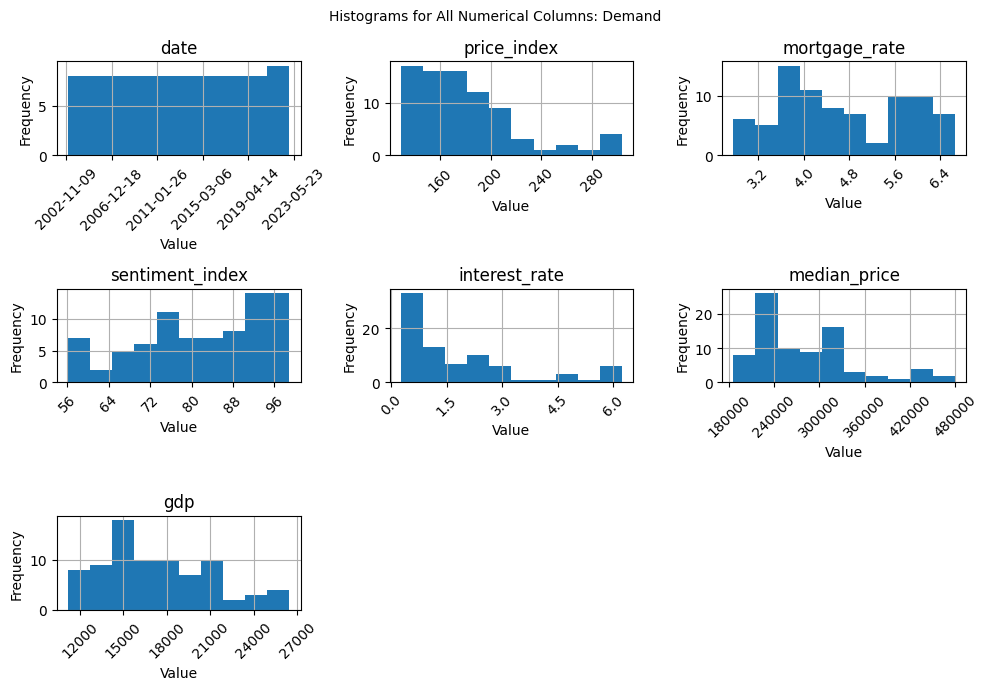

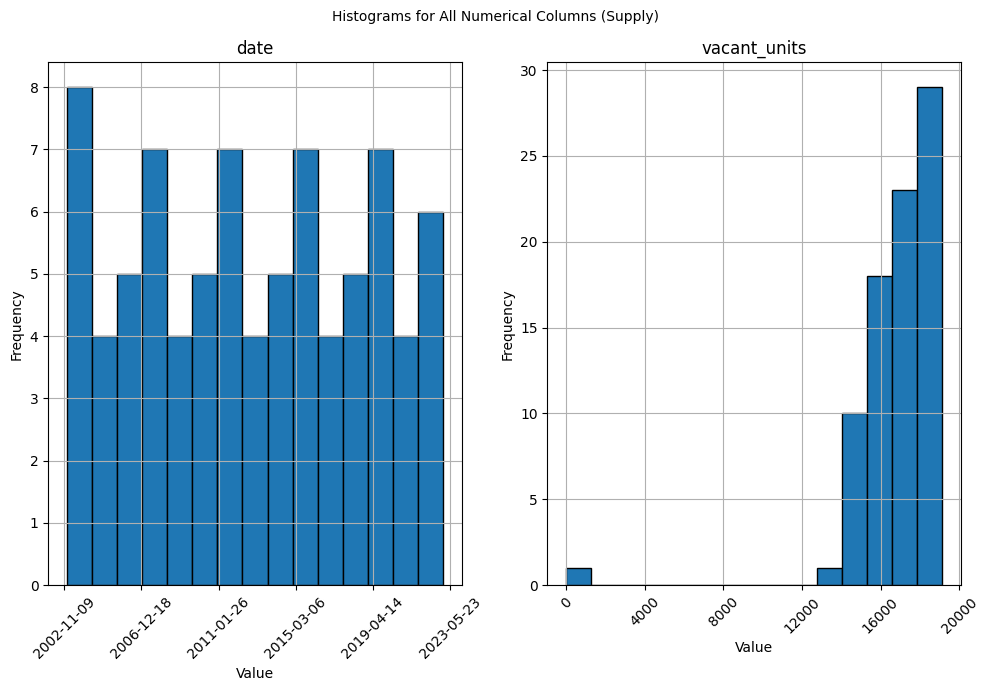

In [6]:
# Histograms for ALL numerical columns : Demand
ax = df_demand.hist(figsize=(10, 7))  
plt.suptitle('Histograms for All Numerical Columns: Demand', fontsize=10)  
plt.xlabel('Value')  
plt.ylabel('Frequency')  

# Adjust x-axis formatting  
for axes in ax.flatten():  
    axes.xaxis.set_major_locator(mticker.MaxNLocator(nbins=6))  # Limit number of ticks  
    axes.tick_params(axis='x', labelsize=10, rotation=45)  
    axes.set_xlabel('Value')  # Apply xlabel to each subplot
    axes.set_ylabel('Frequency')  # Apply ylabel to each subplot
plt.tight_layout()
plt.show()

# Histograms for ALL numerical columns in Supply
ax = df_supply.hist(figsize=(10, 7), bins=15, edgecolor="black")

plt.suptitle("Histograms for All Numerical Columns (Supply)", fontsize=10)

# Adjust x-axis formatting  
for axes in ax.flatten():  
    axes.xaxis.set_major_locator(mticker.MaxNLocator(nbins=6))  # Limit number of ticks  
    axes.tick_params(axis="x", labelsize=10, rotation=45)  
    axes.set_xlabel("Value")  
    axes.set_ylabel("Frequency")  

plt.tight_layout()
plt.show()


## Key Observations from initial data distribution for Numerical Column: Demand and Supply
### Histogram for Vacant Units
The histogram displays the distribution of vacant units in the supply dataset, with values ranging from **14,000 to 19,000**. The highest frequency is observed at **17,000 and 19,000 vacant units**, both appearing **8 times**. The distribution shows notable peaks at **15,000 vacant units (6 times)** and **18,000 vacant units (5 times)**. The pattern suggests clusters of vacant units around **key in and intervals**, with fewer occurrences in between. The dataset appears to have a relatively **uniform spread** across the given range, with no extreme outliers.  

### Histogram for all Numerical Column: Demand
The histograms represent the distribution of values across six numerical columns:

- **Price Index**: Values range between **140 and 300**, with a relatively uniform distribution.
- **Mortgage Rate**: Concentrated mostly between **3.2 and 6.4**, showing a clustered distribution.
- **Sentiment Index**: Spread from **56 to 96**, with peaks around key intervals.
- **Interest Rate**: Values range from **0.0 to 6.0**, suggesting a varied spread.
- **Median Price**: Ranges widely from **180,000 to 480,000**, with noticeable peaks at higher price points.
- **GDP**: Distributed between **12,000 and 27,000**, potentially indicating economic variability.

### Histogram for all Numerical Column: Demand
#### **1. Date Distribution**
- The date values are **evenly spread** across the range from 2002 to 2023.  
- Each date range has a **similar frequency**, suggesting steady data collection over time.  
- No noticeable spikes or gaps, implying consistent recording intervals.

#### **2. Construction Spending**
- Spending is **most frequent around 300,000 USD**, with peaks near **450,000 and 600,000 USD**.  
- Higher spending values are **less frequent**, suggesting fewer high-investment projects.  
- The decreasing trend in frequency at higher amounts indicates **a right-skewed distribution**, meaning most projects stay within lower spending brackets.

#### **3. Vacant Units**
- Most frequent values are **closer to 20,000 vacant units**, with **higher frequencies at the upper end of the range**.  
- The count of vacant units **increases rather than decreasing**, suggesting **a larger stock of unoccupied properties** over time.  
- The peak at the **higher range** may indicate oversupply or housing market stagnation.



### 5. Initial Data Distribution for Categorical Columns  
For categorical columns, the initial data distribution is typically explored using value counts and bar plots. 

C:\Users\kirut\AppData\Local\Temp\ipykernel_23020\2724013564.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


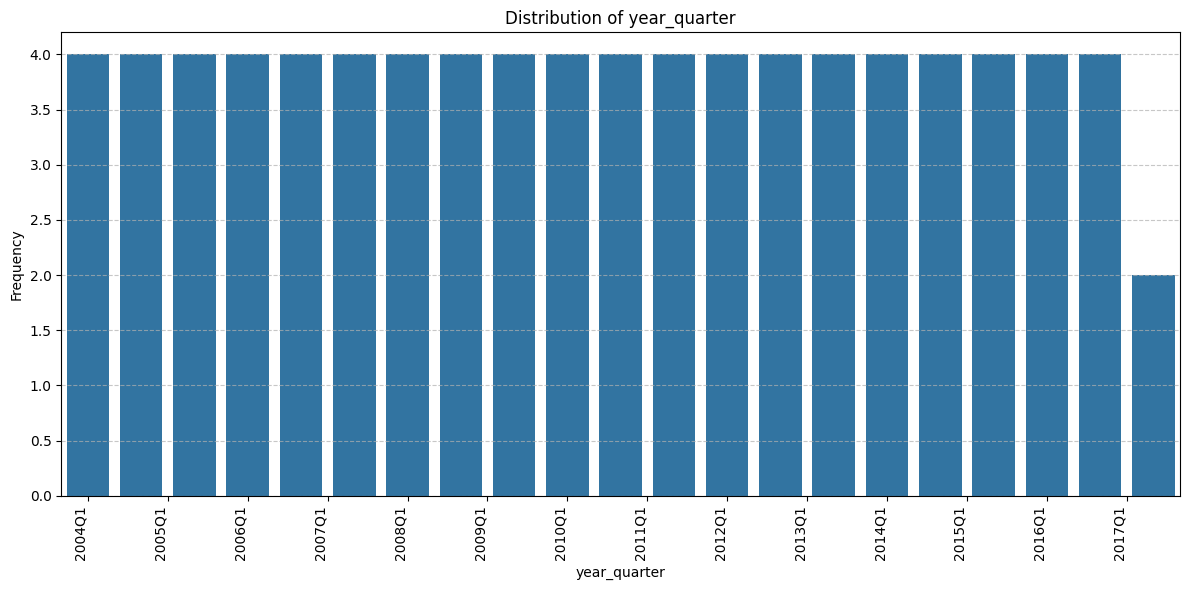

In [ ]:

# Define categorical column for visualization
selected_col = "year_quarter"  # Adjust based on your dataset

if selected_col in df.columns:
    counts = df[selected_col].value_counts()

    # Adjust figure width dynamically based on unique categories
    plt.figure(figsize=(max(12, len(counts) * 0.5), 6)) 
    
    ax = sns.countplot(data=df, x=selected_col, order=counts.index)

    # Rotate labels for better readability
    ax.tick_params(axis='x', labelrotation=90)


    # Reduce tick density if too many labels exist
    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=15))  # Adjust number of displayed labels
    
    plt.title(f'Distribution of {selected_col}', fontsize=12)
    plt.xlabel(selected_col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Improve visibility

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{selected_col}' not found in dataset.")

### Key Observations of the Categorical Column

This bar chart displays the frequency of records across quarterly intervals from **2004Q1 to 2017Q1**. Each bar represents how often a particular `year_quarter` occurs in the dataset.

- Most quarters (2004Q1–2016Q1) have a consistent frequency of **4**.
- **2017Q1** is a notable outlier, appearing only **once**, which may suggest:
  - Incomplete data for that year.
  - A change in data collection methods.
  - Or the dataset simply ends there.

This distribution suggests that the dataset is **evenly balanced** over time until a possible cutoff or anomaly in 2017Q1.

## Initial Data Transformation and Feature Engineering
- We are renaming the column from demand dataset E.g., sentiment_index
- Both the dataset did not have any columns for categorical depiction, we already did a date column transformation so it gives the details about the quarter+year together as one. 
- Now, here we are going to add 2 more categorical column to make our data visualization for better presentation. 



In [8]:
# Rename 'sentiment_index' to 'consumer_sentiment'
if 'sentiment_index' in df_demand.columns:
    df_demand.rename(columns={'sentiment_index': 'consumer_sentiment'}, inplace=True)

# Add price tiers based on 'median_price' in demand dataset 
if 'median_price' in df_demand.columns:
    if 'price_tier' in df_demand.columns:
        df_demand.drop(columns='price_tier', inplace=True)
    df_demand['price_tier'] = pd.qcut(df_demand['median_price'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])

# Add interest rate bands if 'interest_rate' column exists
if 'interest_rate' in df_demand.columns:
    if 'rate_band' in df_demand.columns:
        df_demand.drop(columns='rate_band', inplace=True)
    df_demand['rate_band'] = pd.cut(df_demand['interest_rate'],
                                     bins=[0, 1, 3, 5, 10],
                                     labels=['Low', 'Moderate', 'High', 'Very High'])

# Display the first few rows of the modified demand dataset with new columns
print("---- Modified demand dataset with new columns -----")
display(df_demand[['median_price', 'price_tier', 'interest_rate', 'rate_band', 'consumer_sentiment']].head())

# Save the modified demand dataset with new columns
df_demand.to_csv('project_data/modified_demand.csv', index=False, date_format='%Y-%m-%d')

---- Modified demand dataset with new columns -----


,median_price,price_tier,interest_rate,rate_band,consumer_sentiment
0,186000,Low,2.25,Moderate,79.97
1,191800,Low,2.17,Moderate,89.27
2,191900,Low,2.00,Moderate,89.30
3,198800,Low,2.00,Moderate,91.97
4,212700,Low,2.00,Moderate,98.00


## 7. Initial Visualizations
We are going to focus on 3 goals here to present our initial visualizations. 
**Goal 1:** Explore how the housing price index varies across different price tiers to understand possible demand patterns. 
**Goal 2**: Understand how interest rates affect the housing price index.
**Goal 3:** See how consumer sentiment has trended over time and whether it aligns with economic indicators.

### Goal 1:Pricing index vs Pricing Tier (Demand Dataset)
Explore how the housing price index varies across different price tiers to understand possible demand patterns.

### Chart Type:
Boxplot – to see the distribution of price_index across price_tier categories.

Index(['date', 'price_index', 'mortgage_rate', 'consumer_sentiment',
       'interest_rate', 'median_price', 'gdp', 'year_quarter', 'price_tier',
       'rate_band'],
      dtype='object')


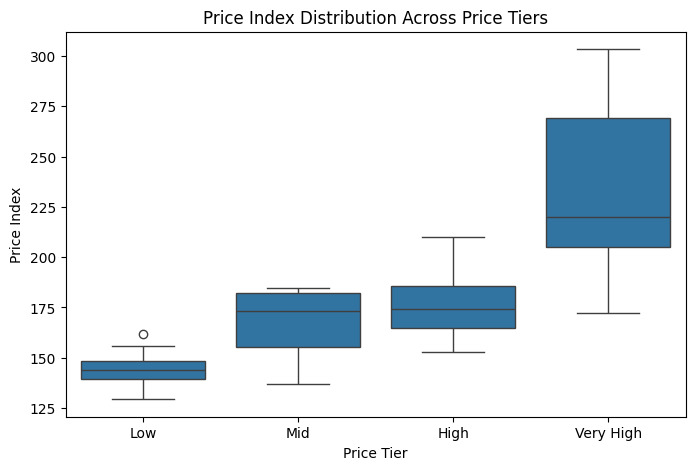

In [9]:

df_demand = pd.read_csv("project_data/modified_demand.csv")
print(df_demand.columns)
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_tier', y='price_index', data=df_demand)
plt.title('Price Index Distribution Across Price Tiers')
plt.xlabel('Price Tier')
plt.ylabel('Price Index')
plt.show()


### Goal 1: Observations
This chart explores how housing price index varies across different price tiers. Price index is used here as a proxy for housing demand: higher price movements often indicate stronger demand.

- The Low Price Tier has a median Price Index around 150, with values ranging mostly between 145 and 155. A single outlier is below the lower whisker.
- The Mid Price Tier has a wider spread, with a median around 170, a lower quartile near 160, and an upper quartile around 180.
- The High Price Tier shows a median Price Index of around 175, with a larger range from 160 to 190.
- The Very High Price Tier has the largest spread, with a median near 225, and values ranging from 200 to 250.

### Interpretations:
From the chart, we can observe whether more expensive tiers experience sharper increases or more volatility in prices compared to lower tiers. This helps us infer which market segments are more dynamic or competitive.


 ## Goal 2 – Impact of Interest Rate on Price Index (Dataset Dataset)
 
**Goal**: Understand how interest rates affect the housing price index.

**Chart Type:** Scatterplot with regression line.

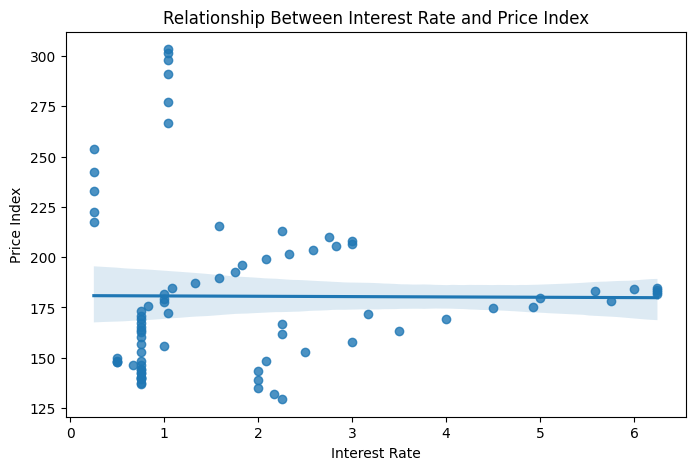

In [10]:
plt.figure(figsize=(8, 5))
sns.regplot(x='interest_rate', y='price_index', data=df_demand)
plt.title('Relationship Between Interest Rate and Price Index')
plt.xlabel('Interest Rate')
plt.ylabel('Price Index')
plt.show()


### Goal 2 Scatter Plot Observations between interest rate and price index

### Key Observations:
- The scatter plot visualizes the relationship between interest rate and price index.
- X-axis: Interest rate, ranging from 0 to 6.
- Y-axis: Price index, varying from 125 to 300.
- Trend Line: A blue regression line highlights the general trend, accompanied by a shaded confidence interval.
- Pattern: The price index appears to decline as interest rates increase, suggesting a potential negative correlation.
  
  ### Interpretations:
  We expect an inverse relationship. Higher interest rates typically suppress buying power, lowering demand and price index. This chart visually tests that hypothesis.


## Goal 3 – Consumer Sentiment Over Time (Demand Dataset)
**Goal**: See how consumer sentiment has trended over time and whether it aligns with economic indicators.

**Chart Type:** Heat Map (Time series)

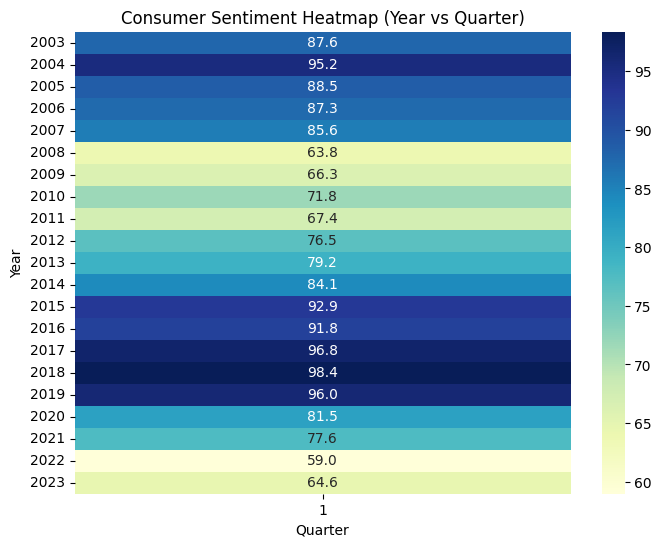

In [11]:
# Split year_quarter into two columns
df_demand_copy = df_demand.copy()
df_demand_copy[['Year', 'Quarter']] = df_demand_copy['year_quarter'].str.split('Q', expand=True)
df_pivot = df_demand_copy.pivot_table(values='consumer_sentiment', index='Year', columns='Quarter', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Consumer Sentiment Heatmap (Year vs Quarter)')
plt.show()


## Goal 3: Consumer Sentiment Heatmap (2003-2023)

### Key Observations
- **Highest sentiment:** 2018 (98.4), 2017 (96.8) — Strong consumer confidence.
- **Lowest sentiment:** 2008 (63.8), 2022 (59.0) — Reflecting economic uncertainty.
- **Major declines:** 2020 (81.5) and 2021 (77.6), possibly due to pandemic effects.

### Interpretation
The heatmap reveals how consumer sentiment fluctuated over two decades. Economic downturns align with drops in confidence, while periods of growth show stronger sentiment.

##  Goal 4: Histogram of Construction Spending (Supply Dataset)
Dataset Used: cleaned_supply.csv
Chart Type: Bar chart

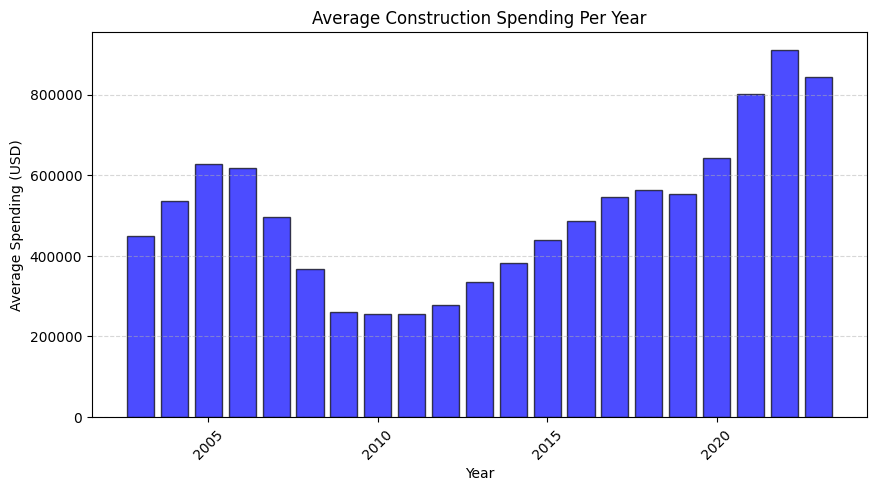

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df_supply = pd.read_csv("project_data/cleaned_supply.csv")

# Convert 'date' to datetime format
df_supply["date"] = pd.to_datetime(df_supply["date"])

# Convert construction_spending to numeric (Fixes non-numeric errors)
df_supply["construction_spending"] = pd.to_numeric(df_supply["construction_spending"], errors="coerce")

# Group by year and compute average construction spending
df_yearly = df_supply.groupby(df_supply["date"].dt.year)["construction_spending"].mean()

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(df_yearly.index, df_yearly.values, color="blue", alpha=0.7, edgecolor="black")

# Formatting
plt.title("Average Construction Spending Per Year")
plt.xlabel("Year")
plt.ylabel("Average Spending (USD)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

### Goal 4: **Observation Notes**  
- **2000–2005:** Spending rose, peaking around 600K USD.  
- **2006–2010:** Declined, likely due to economic downturns.  
- **2011–2015:** Stabilized with steady investment.  
- **2019–2021:** Sharp increase, possibly stimulus-driven.  
- **2022:** Slight decline, suggesting market adjustment.  

This chart explores how new housing supply (via construction permits) may influence housing prices. Generally, an increase in permits could signal growing supply, which may put downward pressure on prices. We observe that during periods of moderate to high interest rates, even high permit volumes didn't lead to much drop in prices, possibly due to inflation or lagging effects in supply completion.

# **US Housing Market Analysis: Supply-Demand Dynamics**

### **Project Summary**  
**Title:** US Housing Market Analysis: Supply-Demand Dynamics  
**Author:** Kiruthikaa  
**Date:** June 11th, 2025  
**Purpose:**  
This project conducts **exploratory data analysis (EDA)** on **housing supply and demand** using economic and market indicators. The goal is to identify **trends, patterns, and interactions** between housing availability, pricing, interest rates, and macroeconomic conditions. The insights from this analysis aim to provide a clearer understanding of how market forces influence real estate dynamics.

## **1. Housing Market Segmentation**  
### **Demand-Side**  
- **Price Tiers:** Homes are classified into **Low, Mid, High, and Very High** tiers based on median prices.  
- **Interest Rate Sensitivity:** Mid and High-tier homes **react significantly** to rate fluctuations, while Very High-tier homes remain **less affected**.  

### **Supply-Side**  
- **Vacant Units Analysis:** Measures **housing availability** across price categories.  
- **Construction Spending Trends:** Analyzes investment cycles driving housing inventory expansion.  
- **Permit Issuance:** Tracks anticipated housing supply growth.  

## **2. Economic Indicators & Market Behavior**  
### **Demand Trends**  
- **Mortgage Rates vs. Consumer Sentiment:** Higher mortgage rates **lower sentiment**, leading to reduced homebuying activity.  
- **GDP & Interest Rates:** Economic growth tends to **strengthen when interest rates are low**, supporting increased housing demand.  

### **Supply Dynamics**  
- **Construction Spending Patterns:**  
  - Investment peaked in **2005 and 2019–2021**, aligning with economic growth periods.  
  - Spending declined in **2022**, likely due to market corrections or external economic factors.  

- **Vacant Unit Distribution:**  
  - Higher vacancy rates suggest **supply-demand imbalances**, particularly in specific pricing tiers.  
  - Growing vacant housing stock **could indicate oversupply in certain regions**.  

## **3. Temporal & Economic Trends**  
### **Demand Visualizations**  
- **Bar Charts:** Compare housing price tiers under different interest rate bands.  
- **Scatter Plots:** Show the impact of mortgage rate fluctuations on consumer sentiment.  
- **Heatmaps:** Illustrate GDP trends and their relationship to rate changes.  

### **Supply Visualizations**  
- **Histograms:** Present the distribution of **construction spending** and **vacant units**.  
- **Time-Series Charts:** Display trends in **permits issued** over multiple years.  
- **Comparative Bar Plots:** Highlight shifts between **supply and demand indicators**.  


## **4. Data Cleaning & Feature Engineering**  
### **Demand Side**  
- **Renamed consumer sentiment index for clarity.**  
- **Segmented interest rate bands to enable structured analysis.**  

### **Supply Side**  
- **Ensured numeric consistency in `construction_spending` and `metro_price_index`.**  
- **Developed `vacancy_rate` as a new feature** to assess housing availability levels.  


## **5. Observations & Key Takeaways**  
- **Interest rates strongly shape housing behavior, impacting both supply and demand.**  
- **Mid-tier homes exhibit the most sensitivity to economic conditions.**  
- **Construction spending follows market cycles, peaking during growth phases.**  
- **High vacancy rates may indicate oversupply or demand saturation.**  

## **6. Next Steps**  
- **Merge supply and demand insights** to refine market equilibrium analysis.  
- **Compare vacancy rates across pricing tiers to identify trends.**  
- **Develop interactive dashboards** for enhanced data exploration.  
